# 1. Variable importance and Model selection

In [13]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import gc  #memory management
#
#Setting styles and aesthetics
pd.set_option('display.max_columns', 200)
pd.options.display.max_rows =30
pd.options.display.float_format = '{:,.2f}'.format

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (30, 20)

In [2]:
train = pd.read_csv('train_clean.csv')
test = pd.read_csv('test_clean.csv')
#
# Check The Shape Of The Data Loaded
print('Train data shape: {} Rows, {} Columns'.format(*train.shape))
display(train.head(3))
#
print('Test data shape: {} Rows, {} Columns'.format(*test.shape))
display(test.head(3))

Train data shape: 3932 Rows, 51 Columns


,ID,country,age_group,total_female,total_male,package_transport_int,package_accomodation,package_insurance,night_mainland,night_zanzibar,first_trip_tz,travel_with_Children,travel_with_Friends/Relatives,travel_with_None,travel_with_Spouse,travel_with_Spouse and Children,purpose_Leisure and Holidays,purpose_Meetings and Conference,purpose_Other,purpose_Scientific and Academic,purpose_Visiting Friends and Relatives,purpose_Volunteering,main_activity_Bird watching,main_activity_Conference tourism,main_activity_Cultural tourism,main_activity_Diving and Sport Fishing,main_activity_Hunting tourism,main_activity_Mountain climbing,main_activity_Wildlife tourism,main_activity_business,"info_source_Newspaper, magazines,brochures","info_source_Radio, TV, Web",info_source_Tanzania Mission Abroad,info_source_Trade fair,"info_source_Travel, agent, tour operator",info_source_inflight magazines,info_source_others,most_impressing_Excellent Experience,most_impressing_Friendly People,most_impressing_Good service,most_impressing_No comments,most_impressing_None,most_impressing_Satisfies and Hope Come Back,"most_impressing_Wonderful Country, Landscape, Nature",payment_mode_Credit Card,payment_mode_Other,payment_mode_Travellers Cheque,night_zanzibar_freq_code,total_female_freq_code,total_male_freq_code,total_cost
0,tour_0,80,2,1,1,0,0,0,13,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,8,9,8,"674,602.50"
1,tour_10,89,1,1,0,0,0,0,14,7,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,7,9,7,"3,214,906.50"
2,tour_1002,89,1,1,1,0,1,0,11,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,8,9,8,"7,790,250.00"


Test data shape: 1402 Rows, 51 Columns


,ID,country,age_group,total_female,total_male,package_transport_int,package_accomodation,package_insurance,night_mainland,night_zanzibar,first_trip_tz,travel_with_Children,travel_with_Friends/Relatives,travel_with_None,travel_with_Spouse,travel_with_Spouse and Children,purpose_Leisure and Holidays,purpose_Meetings and Conference,purpose_Other,purpose_Scientific and Academic,purpose_Visiting Friends and Relatives,purpose_Volunteering,main_activity_Bird watching,main_activity_Conference tourism,main_activity_Cultural tourism,main_activity_Diving and Sport Fishing,main_activity_Hunting tourism,main_activity_Mountain climbing,main_activity_Wildlife tourism,main_activity_business,"info_source_Newspaper, magazines,brochures","info_source_Radio, TV, Web",info_source_Tanzania Mission Abroad,info_source_Trade fair,"info_source_Travel, agent, tour operator",info_source_inflight magazines,info_source_others,most_impressing_Excellent Experience,most_impressing_Friendly People,most_impressing_Good service,most_impressing_No comments,most_impressing_None,most_impressing_Satisfies and Hope Come Back,"most_impressing_Wonderful Country, Landscape, Nature",payment_mode_Credit Card,payment_mode_Other,payment_mode_Travellers Cheque,night_zanzibar_freq_code,total_female_freq_code,total_male_freq_code,total_cost
0,tour_1,1,2,1,1,1,1,1,10,3,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,5,7,7,nan
1,tour_100,65,1,0,4,1,1,0,13,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,8,6,3,nan
2,tour_1006,10,0,2,0,0,0,0,0,4,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,6,5,6,nan


## 1.1 Feature Importance

In [4]:
# modelling 
from xgboost import XGBRegressor
#
# utilities
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder

In [5]:
y = train.total_cost
X = train.drop(['total_cost', 'ID'], axis=1)

In [26]:
model = XGBRegressor(n_estimators=1000,
                    max_depth = 20,
                    learning_rate = 0.1,
                    random_state = 7,
                    objective = 'reg:squarederror',
                    verbosity = 0,
                    eval_metric = 'mae')

In [8]:
# Split into training and validation set
import random
random.seed(123)
#
train_features, valid_features, train_y, valid_y = train_test_split(X, y, test_size = 0.3, random_state = 27)
# Train using early stopping
model.fit(train_features, train_y, 
          eval_metric = 'mae', 
          verbose = 200)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eval_metric='mae', gamma=0,
             gpu_id=-1, importance_type='gain', interaction_constraints=None,
             learning_rate=0.1, max_delta_step=0, max_depth=20,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=0, num_parallel_tree=1, random_state=7,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method=None, validate_parameters=False, verbosity=0)

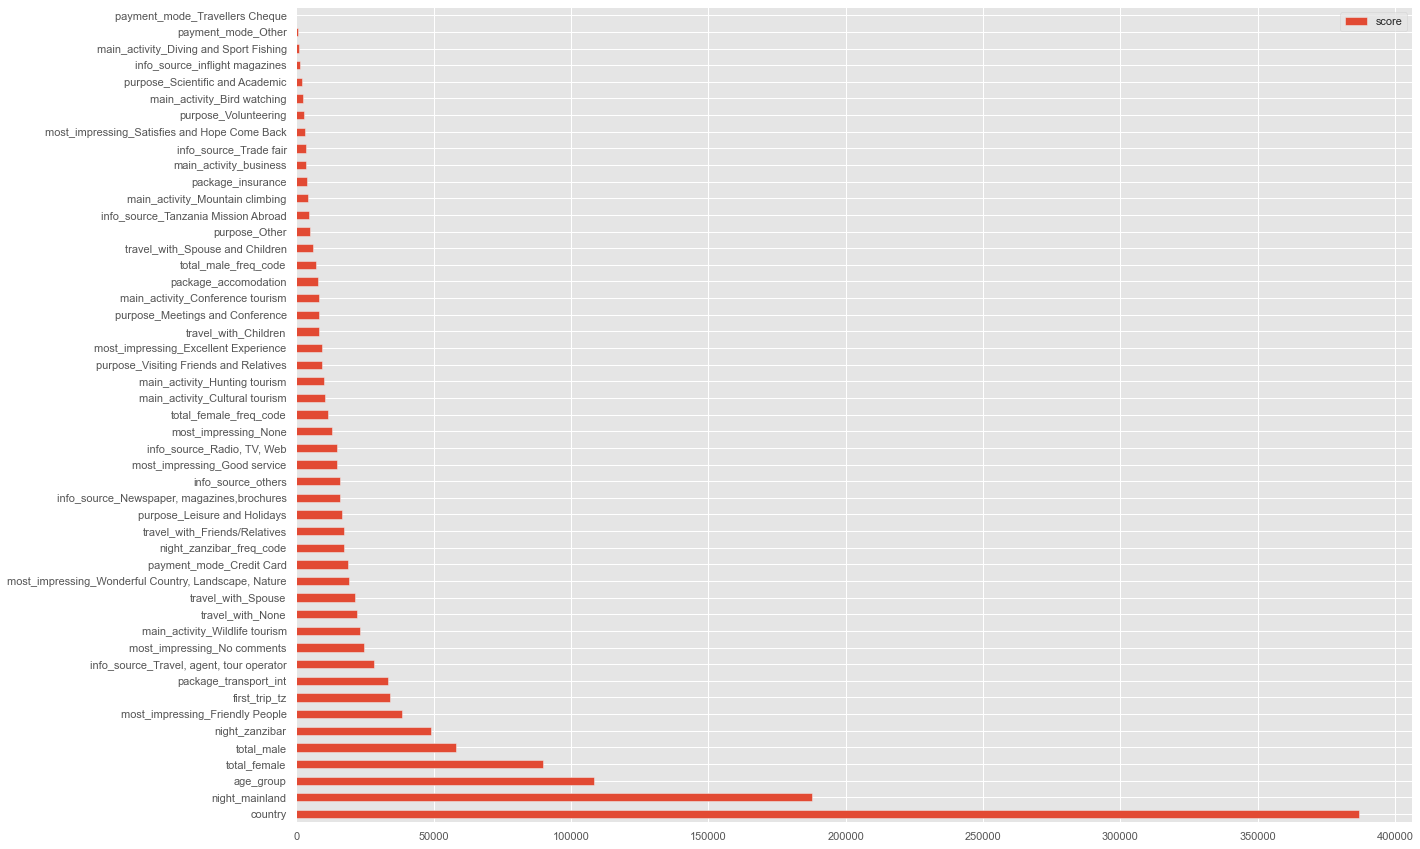

In [11]:
#plot feature importance
feature_important = model.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())
#
data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.plot(kind='barh')
plt.show()

In [15]:
#from xgboost import plot_importance
# plot feature importance
#plot_importance(model)
#plt.show()

In [17]:
#define a function to create variable importance dataframe
def xgb_var_imp(model, train_columns, max_vars=100):
    
    feature_importances_perc = (model.feature_importances_ / sum(model.feature_importances_)) * 100
    cv_varimp_df = pd.DataFrame([train_columns, feature_importances_perc]).T

    cv_varimp_df.columns = ['feature_name', 'varimp (%)']

    cv_varimp_df.sort_values(by='varimp (%)', ascending=False, inplace=True)

    cv_varimp_df = cv_varimp_df.iloc[0:max_vars]   

    return cv_varimp_df

In [19]:
cols = ['country', 'age_group', 'total_female', 'total_male',
       'package_transport_int', 'package_accomodation', 'package_insurance',
       'night_mainland', 'night_zanzibar', 'first_trip_tz',
       'travel_with_Children', 'travel_with_Friends/Relatives',
       'travel_with_None', 'travel_with_Spouse',
       'travel_with_Spouse and Children', 'purpose_Leisure and Holidays',
       'purpose_Meetings and Conference', 'purpose_Other',
       'purpose_Scientific and Academic',
       'purpose_Visiting Friends and Relatives', 'purpose_Volunteering',
       'main_activity_Bird watching', 'main_activity_Conference tourism',
       'main_activity_Cultural tourism',
       'main_activity_Diving and Sport Fishing',
       'main_activity_Hunting tourism', 'main_activity_Mountain climbing',
       'main_activity_Wildlife tourism', 'main_activity_business',
       'info_source_Newspaper, magazines,brochures',
       'info_source_Radio, TV, Web', 'info_source_Tanzania Mission Abroad',
       'info_source_Trade fair', 'info_source_Travel, agent, tour operator',
       'info_source_inflight magazines', 'info_source_others',
       'most_impressing_Excellent Experience',
       'most_impressing_Friendly People', 'most_impressing_Good service',
       'most_impressing_No comments', 'most_impressing_None',
       'most_impressing_Satisfies and Hope Come Back',
       'most_impressing_Wonderful Country, Landscape, Nature',
       'payment_mode_Credit Card', 'payment_mode_Other',
       'payment_mode_Travellers Cheque', 'night_zanzibar_freq_code',
       'total_female_freq_code', 'total_male_freq_code']

In [20]:
xgb_var_imp(model, cols)

,feature_name,varimp (%)
5,package_accomodation,55.42
45,payment_mode_Travellers Cheque,11.09
24,main_activity_Diving and Sport Fishing,3.75
6,package_insurance,3.27
14,travel_with_Spouse and Children,2.22
...,...,...
16,purpose_Meetings and Conference,0.17
31,info_source_Tanzania Mission Abroad,0.16
19,purpose_Visiting Friends and Relatives,0.16
26,main_activity_Mountain climbing,0.11


**Baseline**

In [24]:
#split model
import random
random.seed(1234)
x_train, x_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)
#
#model the training set and calculate the metrics
clf = XGBRegressor().fit(x_train, y_train)
# Predict the model 
pred = clf.predict(x_valid) 
#
from sklearn.metrics import mean_squared_error as MSE 
# RMSE Computation 
rmse = np.sqrt(MSE(y_valid, pred)) 
print("RMSE : % f" %(rmse)) 

RMSE :  4541022.207617


## 2. Model Selection

In [27]:
# import relevant libraries for model selection
# we use different models to get the optimal model

from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from catboost import CatBoostRegressor
import warnings
warnings.filterwarnings('ignore')


# Creating a list of regressor algorithms to compare with
models = [RandomForestRegressor(), GradientBoostingRegressor(), AdaBoostRegressor(), DecisionTreeRegressor(),
          XGBRegressor(objective ='reg:squarederror'), SVR(), KNeighborsRegressor(), LinearRegression(), 
          CatBoostRegressor(logging_level='Silent')]


# Creating lists of the algorithms, to store the accuracy scores of each fold
RandomForest, GradientBoosting, AdaBoost, DecisionTree, XGB, SVR, KNeighbors, Linear, Cat = ([] for x in range(9))


# Creating a list containig the list of each algorithm. Created for easy iteration
model_list = [RandomForest, GradientBoosting, AdaBoost, DecisionTree, XGB, SVR, KNeighbors, Linear, Cat]


# Creating a cross validation of 10 folds
kfold  = KFold(n_splits=10, random_state=101)


# Iterating through each model and appending the scores of each fold to the appriopriate list
for i, j in zip(models, model_list):
  j.extend(list(cross_val_score(i, X, y, scoring = 'neg_mean_squared_error', cv = kfold)))

  
# Creating a function to convert neg_mean_squared_error to a square root
def sq(lis):
  new_lis = []
  lis = np.array(lis)
  for i in lis:
    i = np.sqrt(i*-1)
    new_lis.append(i)
  return new_lis


# Creating a dataframe of all the rmses from the iterations for each model
rmses = pd.DataFrame({'Fold': np.arange(1, 11), 'RandomForest': sq(RandomForest), 'GradientBoosting': sq(GradientBoosting), 
                      'Adaboost': sq(AdaBoost), 'DecisionTree': sq(DecisionTree), 'XGB': sq(XGB), 'SVR': sq(SVR), 
                      'Kneighbors': sq(KNeighbors), 'Linear': sq(Linear), 'Cat': sq(Cat)})

# Setting the index
rmses.set_index('Fold', inplace = True)


# Calculating the mean and standard deviation rmse of each algorithm
rmses.loc['mean'] = rmses.mean()
rmses.loc['std'] = rmses.std()


# Previewing the rmses dataframe
rmses

,RandomForest,GradientBoosting,Adaboost,DecisionTree,XGB,SVR,Kneighbors,Linear,Cat
Fold,,,,,,,,,
1,"4,078,794.57","3,992,974.81","4,176,620.57","5,363,515.55","4,336,755.27","5,531,119.54","4,899,303.83",nan,"3,985,339.85"
2,"5,156,373.68","4,941,204.53","5,052,616.04","7,353,210.91","5,104,564.84","7,691,281.27","5,698,477.81","5,035,822.79","4,842,788.07"
3,"4,294,724.67","4,246,594.16","4,386,686.86","6,048,895.76","4,781,921.87","6,125,722.82","5,039,694.20","4,290,829.23","4,333,827.27"
4,"4,233,143.07","4,324,131.78","4,685,204.16","5,864,055.63","4,533,854.66","6,247,808.14","4,788,473.04","4,230,491.23","4,241,171.39"
5,"4,410,174.31","4,274,052.09","4,665,090.24","5,474,966.98","4,726,985.14","6,086,792.41","4,612,139.02","4,333,367.38","4,404,811.73"
6,"4,765,157.77","4,463,256.55","4,911,251.14","6,431,602.96","5,252,501.64","6,575,715.06","4,792,267.66","4,451,117.19","4,624,058.81"
7,"4,225,264.37","4,203,334.23","4,750,650.65","5,853,476.59","4,579,419.14","6,491,767.15","4,729,808.89","4,264,964.61","4,259,308.60"
8,"4,269,610.56","4,228,750.97","4,637,979.02","5,418,731.11","4,316,650.14","5,958,655.71","4,679,354.47","4,241,196.43","4,273,339.74"
9,"3,966,426.02","3,871,817.62","4,326,669.82","5,339,500.91","4,099,130.50","5,887,299.78","4,325,119.15","3,922,042.80","3,776,783.33"


In [28]:
# return the model with the minimun root mean squared error
rmses.loc['mean'].idxmin(), rmses.loc['mean'].min()

('GradientBoosting', 4172057.2783867023)

In [29]:
# sort the values 
rmses.loc['mean'].sort_values()

GradientBoosting   4,172,057.28
Cat                4,193,144.24
Linear             4,222,198.26
RandomForest       4,250,644.96
XGB                4,509,153.59
Adaboost           4,514,053.15
Kneighbors         4,740,064.26
DecisionTree       5,751,998.82
SVR                6,093,866.52
Name: mean, dtype: float64